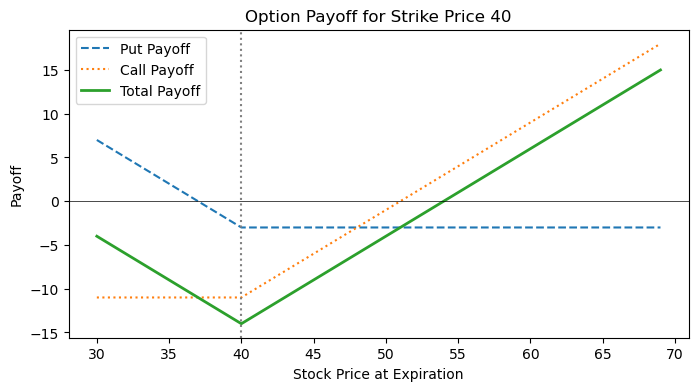

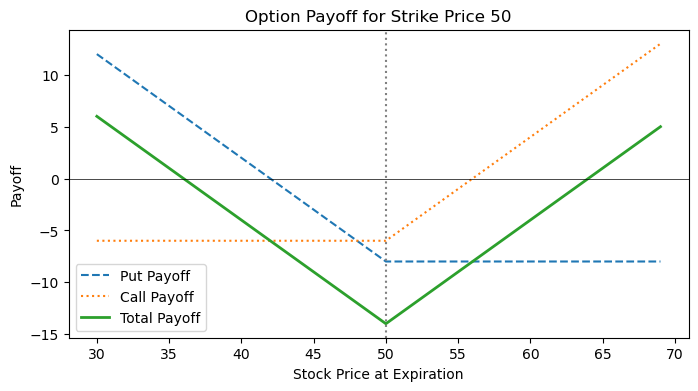

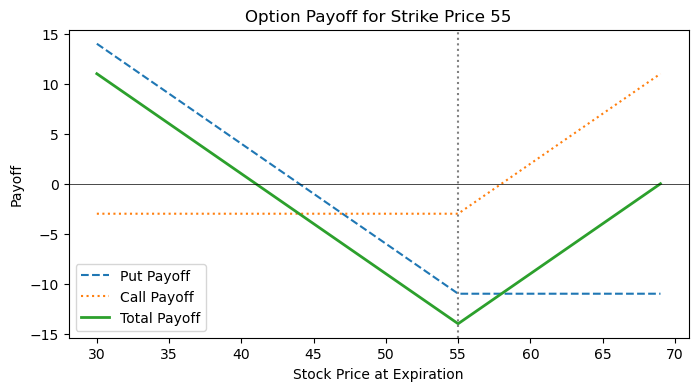

Arbitrage opportunity found between strikes 40 and 50
Strategy: Sell Call 40 for 11, Buy Call 50 for 6, Buy Put 40 for 3, Sell Put 50 for 8. Net credit = 10
Correct pricing should be: Call 40 = -4, Call 50 = 21, Put 40 = 18, Put 50 = -7


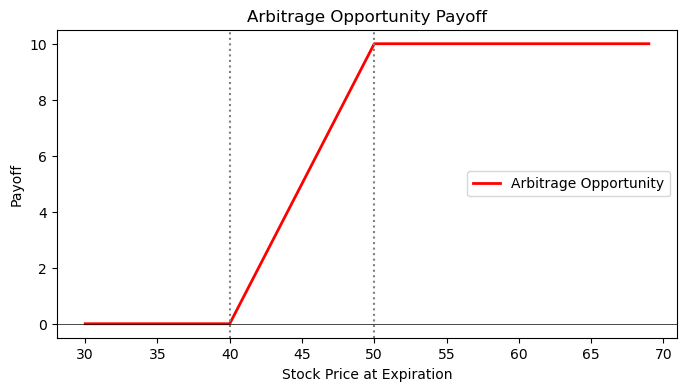

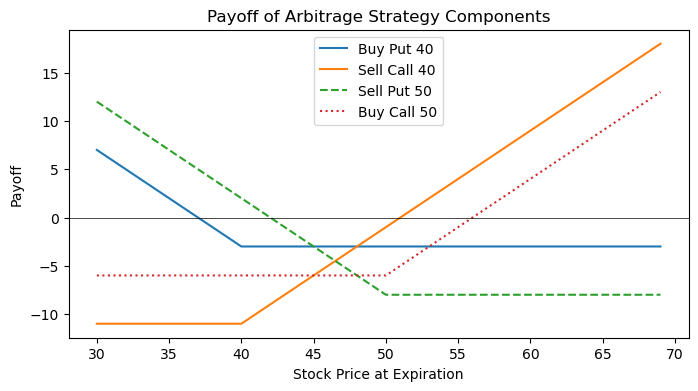

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def check_arbitrage(strikes, put_prices, call_prices):
    arbitrage_opportunity = None
    arbitrage_strategy = ""
    
    for i in range(len(strikes) - 1):
        for j in range(i + 1, len(strikes)):
            K1, P1, C1 = strikes[i], put_prices[i], call_prices[i]
            K2, P2, C2 = strikes[j], put_prices[j], call_prices[j]
            
            if K1 < K2:
                lower_strike, lower_put, lower_call = K1, P1, C1
                higher_strike, higher_put, higher_call = K2, P2, C2
            else:
                lower_strike, lower_put, lower_call = K2, P2, C2
                higher_strike, higher_put, higher_call = K1, P1, C1
                
            mispriced_lower_call = higher_call - (higher_strike - lower_strike)
            mispriced_higher_call = lower_call + (higher_strike - lower_strike)
            mispriced_lower_put = higher_put + (higher_strike - lower_strike)
            mispriced_higher_put = lower_put - (higher_strike - lower_strike)
            
            if (higher_call - lower_call - (higher_strike - lower_strike) > 0) or \
               (lower_put - higher_put - (higher_strike - lower_strike) > 0) or \
               (lower_call - higher_call + (higher_strike - lower_strike) > 0) or \
               (higher_put - lower_put + (higher_strike - lower_strike) > 0):
                arbitrage_opportunity = (lower_strike, higher_strike)
                arbitrage_strategy = (
                    f"Sell Call {lower_strike} for {lower_call}, Buy Call {higher_strike} for {higher_call}, "
                    f"Buy Put {lower_strike} for {lower_put}, Sell Put {higher_strike} for {higher_put}. "
                    f"Net credit = {lower_call - higher_call + higher_put - lower_put}\n"
                    f"Correct pricing should be: Call {lower_strike} = {mispriced_lower_call}, "
                    f"Call {higher_strike} = {mispriced_higher_call}, "
                    f"Put {lower_strike} = {mispriced_lower_put}, "
                    f"Put {higher_strike} = {mispriced_higher_put}"
                )
                break
        if arbitrage_opportunity:
            break
    
    return arbitrage_opportunity, arbitrage_strategy

def plot_option_payoff(strike, put_price, call_price, S_range=np.arange(30, 70, 1)):
    put_payoff = np.maximum(strike - S_range, 0) - put_price
    call_payoff = np.maximum(S_range - strike, 0) - call_price
    total_payoff = put_payoff + call_payoff
    
    plt.figure(figsize=(8, 4))
    plt.plot(S_range, put_payoff, label='Put Payoff', linestyle='dashed')
    plt.plot(S_range, call_payoff, label='Call Payoff', linestyle='dotted')
    plt.plot(S_range, total_payoff, label='Total Payoff', linewidth=2)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(strike, color='gray', linestyle='dotted')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.title(f'Option Payoff for Strike Price {strike}')
    plt.legend()
    plt.show()

def plot_arbitrage(lower_strike, higher_strike, S_range=np.arange(30, 70, 1)):
    arb_payoff = np.minimum(higher_strike - S_range, 0) - np.minimum(lower_strike - S_range, 0)
    
    plt.figure(figsize=(8, 4))
    plt.plot(S_range, arb_payoff, label='Arbitrage Opportunity', color='red', linewidth=2)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(lower_strike, color='gray', linestyle='dotted')
    plt.axvline(higher_strike, color='gray', linestyle='dotted')
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.title('Arbitrage Opportunity Payoff')
    plt.legend()
    plt.show()

def plot_arbitrage_options(lower_strike, higher_strike, lower_put, lower_call, higher_put, higher_call, S_range=np.arange(30, 70, 1)):
    lower_put_payoff = np.maximum(lower_strike - S_range, 0) - lower_put
    lower_call_payoff = np.maximum(S_range - lower_strike, 0) - lower_call
    higher_put_payoff = np.maximum(higher_strike - S_range, 0) - higher_put
    higher_call_payoff = np.maximum(S_range - higher_strike, 0) - higher_call
    
    plt.figure(figsize=(8, 4))
    plt.plot(S_range, lower_put_payoff, label=f'Buy Put {lower_strike}')
    plt.plot(S_range, lower_call_payoff, label=f'Sell Call {lower_strike}')
    plt.plot(S_range, higher_put_payoff, label=f'Sell Put {higher_strike}', linestyle='dashed')
    plt.plot(S_range, higher_call_payoff, label=f'Buy Call {higher_strike}', linestyle='dotted')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.title('Payoff of Arbitrage Strategy Components')
    plt.legend()
    plt.show()

# Dados das opções
strikes = [40, 50, 55]
put_prices = [3, 8, 11]
call_prices = [11, 6, 3]

# Identificar arbitragem
arb, strategy = check_arbitrage(strikes, put_prices, call_prices)

# Plotar os gráficos individuais
for i in range(len(strikes)):
    plot_option_payoff(strikes[i], put_prices[i], call_prices[i])

# Se houver arbitragem, plotar os gráficos correspondentes
if arb:
    print(f'Arbitrage opportunity found between strikes {arb[0]} and {arb[1]}')
    print(f'Strategy: {strategy}')
    plot_arbitrage(*arb)
    lower_idx, higher_idx = strikes.index(arb[0]), strikes.index(arb[1])
    plot_arbitrage_options(arb[0], arb[1], put_prices[lower_idx], call_prices[lower_idx], put_prices[higher_idx], call_prices[higher_idx])
else:
    print('No arbitrage opportunity found.')